# Portfolio benchmark

- https://www.bogleheads.org/wiki/Three-fund_portfolio
- https://www.bogleheads.org/wiki/Lazy_portfolios

In [1]:
import bt

%matplotlib inline

START_DATE = '2015-01-01'

<AxesSubplot:title={'center':'Equity Progression'}>

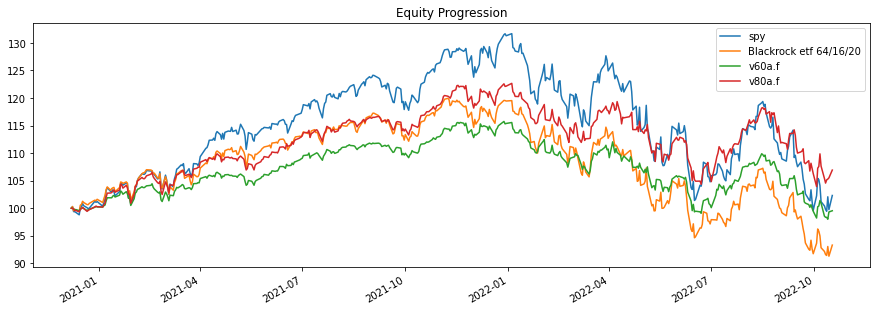

In [2]:
def make_buy_and_hold_test(ticker):
    s = bt.Strategy(
        ticker,
        [
            bt.algos.RunOnce(),
            bt.algos.SelectAll(),
            bt.algos.WeighEqually(),
            bt.algos.Rebalance(),
        ]
    )
    data = bt.get(ticker, start=START_DATE)
    t = bt.Backtest(s, data)
    return t

def make_passive_portfolio_test(name, weights, rebalance_period):
    s = bt.Strategy(
        name,
        [
            {"M": bt.algos.RunMonthly(), "Q": bt.algos.RunQuarterly(), "A": bt.algos.RunYearly()}[rebalance_period],
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(**weights),
            bt.algos.Rebalance(),
        ]
    )
    data = bt.get(','.join(weights.keys()), start=START_DATE)
    t = bt.Backtest(s, data)
    return t

res = bt.run(
    make_buy_and_hold_test('spy'),
    # make_passive_portfolio_test('Vanguard 64/16/20', {
    #     "vtsax": 0.64,
    #     "vtiax": 0.16,
    #     "vbtlx": 0.20,
    # }, 'M'),
    # make_passive_portfolio_test('Vanguard 48/12/40', {
    #     "vtsax": 0.48,
    #     "vtiax": 0.12,
    #     "vbtlx": 0.40,
    # }, 'M'),
    # make_passive_portfolio_test('Vanguard 34/33/33', {
    #     "vtsax": 0.34,
    #     "vtiax": 0.33,
    #     "vbtlx": 0.33,
    # }, 'M'),
    # make_passive_portfolio_test('Vanguard 32/08/60', {
    #     "vtsax": 0.32,
    #     "vtiax": 0.08,
    #     "vbtlx": 0.60,
    # }, 'M'),
    # make_passive_portfolio_test('Vanguard 16/04/80', {
    #     "vtsax": 0.16,
    #     "vtiax": 0.04,
    #     "vbtlx": 0.80,
    # }, 'M'),
    make_passive_portfolio_test('Blackrock etf 64/16/20', {
        "itot": 0.64,
        "ixus": 0.16,
        "agg": 0.20,
    }, 'M'),
    # make_passive_portfolio_test('Blackrock etf 48/12/40', {
    #     "itot": 0.48,
    #     "ixus": 0.12,
    #     "agg": 0.40,
    # }, 'M'),
    # make_passive_portfolio_test('Blackrock etf 34/33/33', {
    #     "itot": 0.34,
    #     "ixus": 0.33,
    #     "agg": 0.33,
    # }, 'M'),
    # make_passive_portfolio_test('core 4 60/40', {
    #     "itot": 0.30,
    #     "ixus": 0.24,
    #     "agg": 0.40,
    #     "usrt": 0.06,
    # }, 'M'),
    # make_passive_portfolio_test('core 4 80/20', {
    #     "itot": 0.40,
    #     "ixus": 0.32,
    #     "agg": 0.20,
    #     "usrt": 0.08,
    # }, 'M'),
    # make_passive_portfolio_test('Permanent portfolio', {
    #     "itot": 0.25,
    #     "iau": 0.25,
    #     "shy": 0.25,
    #     "tlt": 0.25,
    # }, 'M'),
    # make_passive_portfolio_test('All weather portfolio', {
    #     "itot": 0.30,
    #     "tlt": 0.40,
    #     "gvi": 0.15,
    #     "comt": 0.075,
    #     "iau": 0.075,
    # }, 'M'),
    make_buy_and_hold_test('v60a.f'),
    make_buy_and_hold_test('v80a.f'),
)
res.plot()

In [3]:
res.display()

Stat                 spy         Blackrock etf 64/16/20    v60a.f      v80a.f
-------------------  ----------  ------------------------  ----------  ----------
Start                2020-12-07  2020-12-07                2020-12-07  2020-12-07
End                  2022-10-17  2022-10-17                2022-10-17  2022-10-17
Risk-free rate       0.00%       0.00%                     0.00%       0.00%

Total Return         2.31%       -6.69%                    -0.46%      6.92%
Daily Sharpe         0.16        -0.17                     0.02        0.34
Daily Sortino        0.25        -0.27                     0.03        0.54
CAGR                 1.24%       -3.66%                    -0.25%      3.66%
Max Drawdown         -24.47%     -23.88%                   -15.33%     -15.27%
Calmar Ratio         0.05        -0.15                     -0.02       0.24

MTD                  2.70%       1.71%                     0.10%       0.60%
3m                   -4.36%      -4.92%                    